In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def loadData():
    with np.load('notMNIST.npz') as dataset:
        Data, Target = dataset['images'], dataset['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget

In [3]:
#load data
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

In [4]:
trainData = trainData.reshape((trainData.shape[0], -1))
validData = validData.reshape((validData.shape[0], -1))
testData = testData.reshape((testData.shape[0], -1))

In [5]:
def get_accuracy(w, b, x, y):
    correct = 0
    y_hat = 1.0 / (1.0 + np.exp(-np.matmul(x, w) - b))
    for idx in range(len(y_hat)):
        if y_hat[idx] >= 0.5 and y[idx] == 1:
            correct += 1
        if y_hat[idx] < 0.5 and y[idx] == 0:
            correct += 1
    return correct / len(y_hat)

In [6]:
def buildGraph(learning_rate):
    w = tf.Variable(tf.truncated_normal(shape=(784, 1), mean=0.0, stddev=0.5, dtype=tf.float32))
    b = tf.Variable(0, dtype=tf.float32)
    
    train_data = tf.placeholder(tf.float32)
    train_label = tf.placeholder(tf.float32)
    lam = tf.placeholder(tf.float32)
    
    logits = tf.matmul(train_data, w) + b
    loss = tf.losses.sigmoid_cross_entropy(train_label, logits)
    regularization = tf.nn.l2_loss(w)
    CEloss = loss + lam * regularization
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train = optimizer.minimize(CEloss)
    
    return w, b, train_data, train_label, tf.sigmoid(logits), CEloss, train, lam

In [7]:
def SGD(batch_size, epoch_num, learning_rate, traindata, traintarget, validata, validtarget, reg):
    w, b, train_data, train_label, logits, CEloss, train, lam = buildGraph(learning_rate)
    
    train_loss, train_acc, val_loss, val_acc = [], [], [], []
    
    init_op = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init_op)
        for epochs in range(epoch_num):
            #shuffle according to indices
            indices = np.arange(traindata.shape[0])
            np.random.shuffle(indices)
            traindata = traindata[indices]
            traintarget = traintarget[indices]
            
            iteration_number = int(traindata.shape[0]/batch_size)
            for i in range(iteration_number):
                train_d = trainData[i*batch_size:(i+1)*batch_size]
                train_t = trainTarget[i*batch_size:(i+1)*batch_size]
                train_w, train_b, t_loss, t_label, train_optimizer = sess.run([w, b, CEloss, logits, train],{
                        train_data: train_d,
                        train_label: train_t,
                        lam: reg
                    })
                v_loss = sess.run(CEloss, {
                        train_data: validata,
                        train_label: validtarget,
                        lam: reg
                    })
                
            #print(CEloss)
            train_loss.append(t_loss)
            train_acc.append(get_accuracy(train_w, train_b, traindata, traintarget))
            val_loss.append(v_loss)
            val_acc.append(get_accuracy(train_w, train_b, validata, validtarget))
            
    number = range(len(train_loss))
    plt.plot(number, train_loss)
    plt.plot(number, val_loss)
    plt.legend(['train_loss', 'val_loss'])
    plt.xlabel("epoch numbers")
    plt.ylabel("loss")
    plt.title("Training and validation loss")
    plt.show()
    plt.plot(number, train_acc)
    plt.plot(number, val_acc)
    plt.legend(['train_acc', 'val_acc'])
    plt.xlabel("epoch numbers")
    plt.ylabel("accuracy")
    plt.title("Training and validation accuracy")
    plt.show()
    
    print("Final training loss:", train_loss[-1], ", validation loss:", val_loss[-1])
    print("Final training accuracy:", train_acc[-1], ", validation accuracy:", val_acc[-1])
            
    return train_w, train_b

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


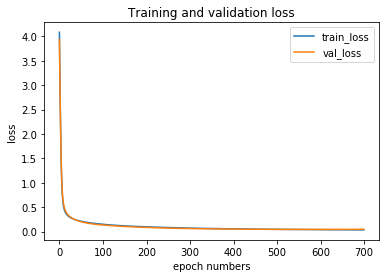

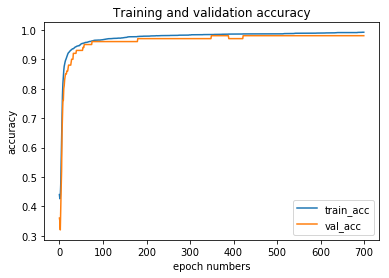

Final training loss: 0.0329793 , validation loss: 0.0457182
Final training accuracy: 0.9917142857142857 , validation accuracy: 0.98


In [19]:
ww, bb = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0)

In [21]:
testData = testData.reshape((testData.shape[0], -1))
print("Test accuracy is:", get_accuracy(ww, bb, testData, testTarget))

Test accuracy is: 0.9793103448275862


INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


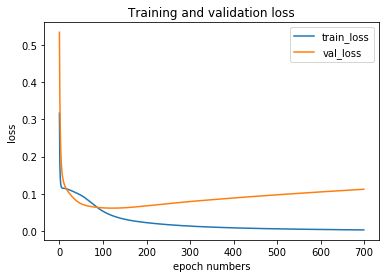

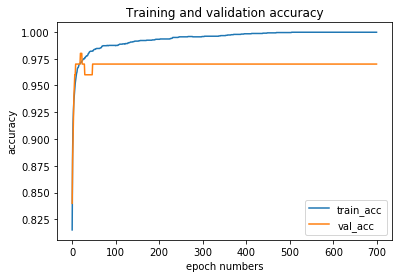

Final training loss: 0.00320156 , validation loss: 0.112412
Final training accuracy: 0.9997142857142857 , validation accuracy: 0.97


In [10]:
#batch_size = 100
w1, b1 = SGD(100, 700, 0.001, trainData, trainTarget, validData, validTarget, 0)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


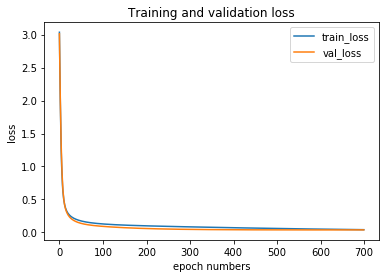

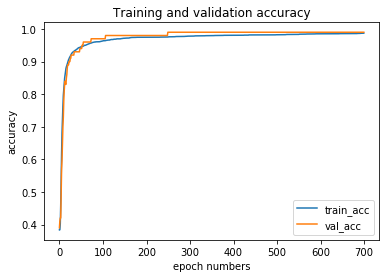

Final training loss: 0.0406713 , validation loss: 0.0375426
Final training accuracy: 0.9871428571428571 , validation accuracy: 0.99


In [18]:
#batch_size = 700
w2, b2 = SGD(700, 700, 0.001, trainData, trainTarget, validData, validTarget, 0)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


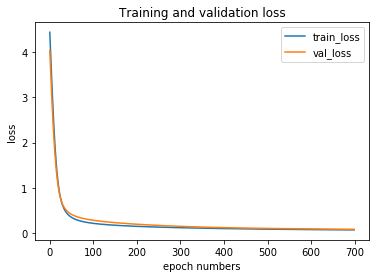

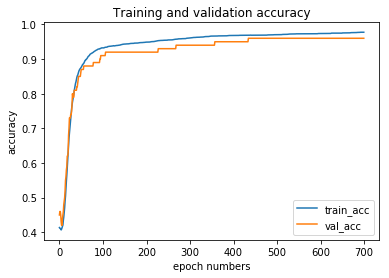

Final training loss: 0.0760902 , validation loss: 0.0904019
Final training accuracy: 0.9774285714285714 , validation accuracy: 0.96


In [19]:
#batch_size = 1750
w3, b3 = SGD(1750, 700, 0.001, trainData, trainTarget, validData, validTarget, 0)

In [20]:
testData = testData.reshape((testData.shape[0], -1))
print("Test accuracy with 100 batch size is:", get_accuracy(w1, b1, testData, testTarget))
print("Test accuracy with 700 batch size is:", get_accuracy(w2, b2, testData, testTarget))
print("Test accuracy with 1750 batch size is:", get_accuracy(w3, b3, testData, testTarget))

Test accuracy with 100 batch size is: 0.9724137931034482
Test accuracy with 700 batch size is: 0.9793103448275862
Test accuracy with 1750 batch size is: 0.9586206896551724


In [ ]:
#4.changeing the hyperparameter

In [ ]:
#first we investigate beta1

In [6]:
def buildGraph(batch_size, learning_rate, beta1, beta2, epsilon):
    w = tf.Variable(tf.truncated_normal(shape=(784, 1), mean=0.0, stddev=0.5, dtype=tf.float32))
    b = tf.Variable(0, dtype=tf.float32)
    
    train_data = tf.placeholder(tf.float32)
    train_label = tf.placeholder(tf.float32)
    lam = tf.placeholder(tf.float32)
    
    logits = tf.matmul(train_data, w) + b
    loss = tf.losses.sigmoid_cross_entropy(train_label, logits)
    regularization = tf.nn.l2_loss(w)
    CEloss = loss + lam * regularization
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1, beta2=beta2, epsilon=epsilon)
    train = optimizer.minimize(CEloss)
    
    return w, b, train_data, train_label, logits, CEloss, train, lam

def SGD(batch_size, epoch_num, learning_rate, traindata, traintarget, validata, validtarget, reg, beta1, beta2, epsilon):
    w, b, train_data, train_label, logits, CEloss, train, lam = buildGraph(batch_size, learning_rate, beta1, beta2, epsilon)
    
    train_loss, train_acc, val_loss, val_acc = [], [], [], []
    
    init_op = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init_op)
        for epochs in range(epoch_num):
            #shuffle according to indices
            indices = np.arange(traindata.shape[0])
            np.random.shuffle(indices)
            traindata = traindata[indices]
            traintarget = traintarget[indices]
            
            iteration_number = int(traindata.shape[0]/batch_size)
            for i in range(iteration_number):
                train_d = trainData[i*batch_size:(i+1)*batch_size]
                train_t = trainTarget[i*batch_size:(i+1)*batch_size]
                train_w, train_b, t_loss, t_label, train_optimizer = sess.run([w, b, CEloss, logits, train],{
                        train_data: train_d,
                        train_label: train_t,
                        lam: reg
                    })
                v_loss = sess.run(CEloss, {
                        train_data: validata,
                        train_label: validtarget,
                        lam: reg
                    })
                
            #print(CEloss)
            train_loss.append(t_loss)
            train_acc.append(get_accuracy(train_w, train_b, traindata, traintarget))
            val_loss.append(v_loss)
            val_acc.append(get_accuracy(train_w, train_b, validata, validtarget))
            
    number = range(len(train_loss))
    plt.plot(number, train_loss)
    plt.plot(number, val_loss)
    plt.legend(['train_loss', 'val_loss'])
    plt.xlabel("epoch numbers")
    plt.ylabel("loss")
    plt.title("Training and validation loss")
    plt.show()
    plt.plot(number, train_acc)
    plt.plot(number, val_acc)
    plt.legend(['train_acc', 'val_acc'])
    plt.xlabel("epoch numbers")
    plt.ylabel("accuracy")
    plt.title("Training and validation accuracy")
    plt.show()
    
    print("Final training loss:", train_loss[-1], ", validation loss:", val_loss[-1])
    print("Final training accuracy:", train_acc[-1], ", validation accuracy:", val_acc[-1])
            
    return train_w, train_b

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


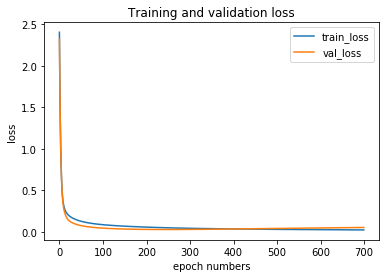

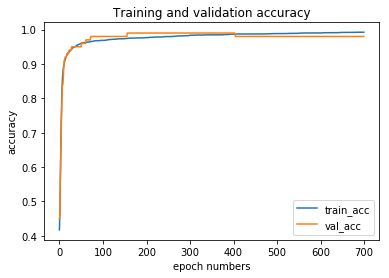

Final training loss: 0.0234856 , validation loss: 0.0527862
Final training accuracy: 0.9922857142857143 , validation accuracy: 0.98


In [7]:
#beta1 = 0.95
w4, b4 = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0, 0.95, 0.999, 1e-8)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


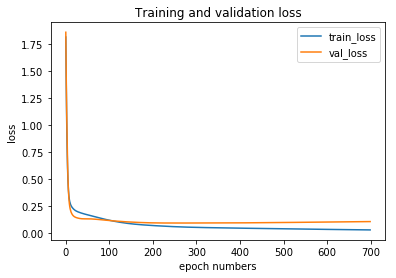

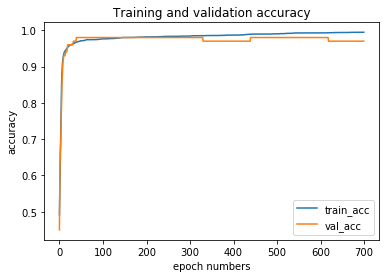

Final training loss: 0.0273594 , validation loss: 0.104652
Final training accuracy: 0.9945714285714286 , validation accuracy: 0.97


In [25]:
#beta1 = 0.99
w5, b5 = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0, 0.99, 0.999, 1e-8)

In [16]:
testData = testData.reshape((testData.shape[0], -1))
print("Test accuracy when beta1 = 0.95  is:", get_accuracy(w4, b4, testData, testTarget))
print("Test accuracy when beta2 = 0.99 is:", get_accuracy(w5, b5, testData, testTarget))

Test accuracy when beta1 = 0.95  is: 0.9724137931034482
Test accuracy when beta2 = 0.99 is: 0.9655172413793104


In [17]:
#test the effect of beta2

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


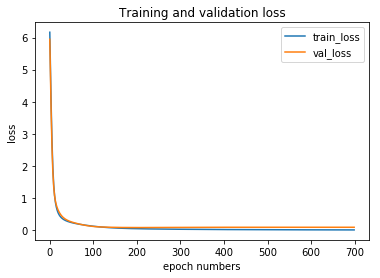

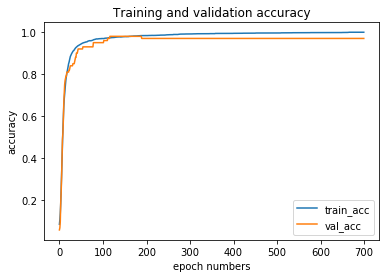

Final training loss: 0.0119178 , validation loss: 0.0945446
Final training accuracy: 0.9994285714285714 , validation accuracy: 0.97


In [12]:
#beta2 = 0.99
w6, b6 = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0, 0.9, 0.99, 1e-8)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


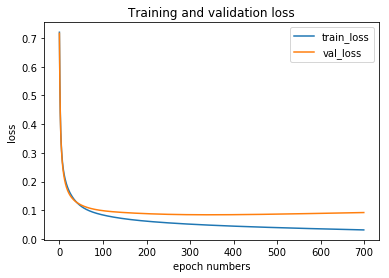

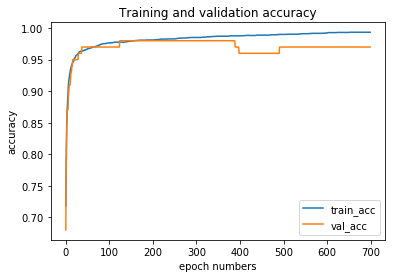

Final training loss: 0.0315811 , validation loss: 0.0921095
Final training accuracy: 0.9934285714285714 , validation accuracy: 0.97


In [13]:
#beta2 = 0.9999
w7, b7 = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0, 0.9, 0.9999, 1e-8)

In [10]:
testData = testData.reshape((testData.shape[0], -1))
print("Test accuracy when beta2 = 0.99  is:", get_accuracy(w6, b6, testData, testTarget))
print("Test accuracy when beta2 = 0.9999 is:", get_accuracy(w7, b7, testData, testTarget))

Test accuracy when beta2 = 0.99  is: 0.9724137931034482
Test accuracy when beta2 = 0.9999 is: 0.9793103448275862


In [ ]:
#test the effect of  epsilon

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


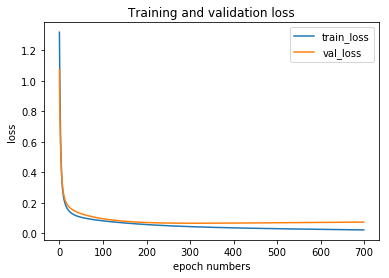

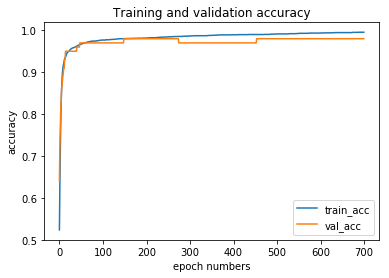

Final training loss: 0.0224922 , validation loss: 0.0737367
Final training accuracy: 0.9954285714285714 , validation accuracy: 0.98


In [21]:
#epsilon = 1e-4
w8, b8 = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0, 0.9, 0.999, 1e-4)

INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


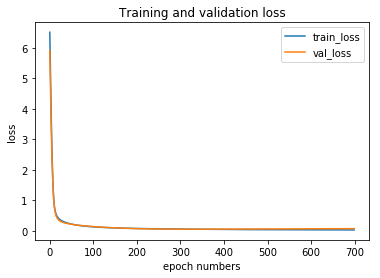

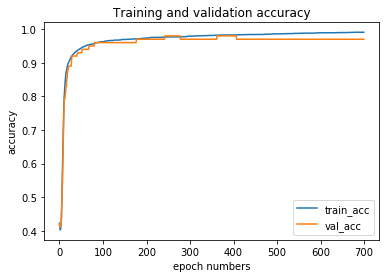

Final training loss: 0.0317602 , validation loss: 0.0733839
Final training accuracy: 0.9908571428571429 , validation accuracy: 0.97


In [22]:
#epsilon = 1e-9
w9, b9 = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0, 0.9, 0.999, 1e-9)

In [14]:
testData = testData.reshape((testData.shape[0], -1))
print("Test accuracy when epsilon = 1e-4 is:", get_accuracy(w8, b8, testData, testTarget))
print("Test accuracy when epsilon = 1e-9 is:", get_accuracy(w9, b9, testData, testTarget))

Test accuracy when epsilon = 1e-4 is: 0.9793103448275862
Test accuracy when epsilon = 1e-9 is: 0.9724137931034482


INFO:tensorflow:logits.dtype=<dtype: 'float32'>.
INFO:tensorflow:multi_class_labels.dtype=<dtype: 'float32'>.
INFO:tensorflow:losses.dtype=<dtype: 'float32'>.


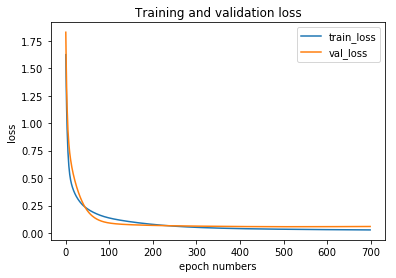

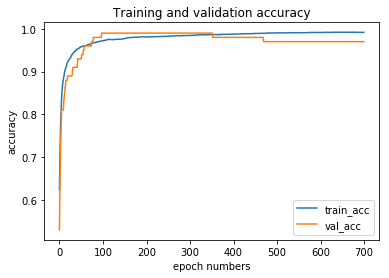

Final training loss: 0.029023 , validation loss: 0.0601625
Final training accuracy: 0.9917142857142857 , validation accuracy: 0.97


In [17]:
#Final training
wf, bf = SGD(500, 700, 0.001, trainData, trainTarget, validData, validTarget, 0, 0.95, 0.9999, 1e-9)

In [18]:
testData = testData.reshape((testData.shape[0], -1))
print("Test accuracy is:", get_accuracy(wf, bf, testData, testTarget))

Test accuracy is: 0.9862068965517241
